# Anisotropic Filter

In [9]:
import sys
sys.path.append('..')

In [10]:
import matplotlib.pyplot
import matplotlib.cm

import matplotlib

matplotlib.rcParams['figure.facecolor'] = '303030'
matplotlib.rcParams['axes.facecolor'] = '303030'
matplotlib.rcParams['text.color'] = 'FFFFFF'
matplotlib.rcParams['xtick.color'] = 'FFFFFF'
matplotlib.rcParams['ytick.color'] = 'FFFFFF'
matplotlib.rcParams['axes.labelcolor'] = 'FFFFFF'

import numpy
import pandas

import pathlib

In [11]:
import lasp.convert
import lasp.metrics
import lasp.noise
import lasp.io
import lasp.filters

In [12]:
path_results =  pathlib.Path('./results')
path_output = path_results / pathlib.Path('anisotropic')
if not(path_output.exists()):
    path_output.mkdir()

In [13]:
# Read greylevel image
# Read greylevel image
img = lasp.io.read(image_path = path_results / pathlib.Path('original.npy'))
img_noised = lasp.io.read(image_path = path_results / pathlib.Path('noised.npy'))

In [14]:
LAMDA_INF = 0
LAMDA_SUP = 0.05
NB_LAMDA = 4

lamda = numpy.arange(LAMDA_INF, LAMDA_SUP, (LAMDA_SUP - LAMDA_INF)/NB_LAMDA)

K_INF = 20
K_SUP = 40
NB_K = 5
k = numpy.arange(K_INF, K_SUP, (K_SUP-K_INF)/NB_K)

m, n = len(lamda), len(k)

metrics = {
    'mae' : numpy.zeros(shape=(m, n)),
    'mse' : numpy.zeros(shape=(m, n)),
    'psnr' : numpy.zeros(shape=(m, n))
}

In [15]:
for i in range(0, m):
    for j in range(0, n):
        img_denoised = lasp.filters.anisotropic_filter(img_noised, lamda[i], k[j], 40)
        metrics['mae'][i, j] = lasp.metrics.mean_absolute_error(img_denoised, img)
        metrics['mse'][i, j] = lasp.metrics.mean_squared_error(img_denoised, img)
        metrics['psnr'][i, j] = lasp.metrics.peak_signal_to_noise_ratio(img_denoised, img)

with open(path_output / 'mse.npy', 'wb') as f:
    numpy.save(f, metrics['mse'])

with open(path_output / 'psnr.npy', 'wb') as f:
    numpy.save(f, metrics['psnr'])

with open(path_output / 'mae.npy', 'wb') as f:
    numpy.save(f, metrics['mae'])

## Figure for presentation

In [6]:
LAMDA_INF = 0
LAMDA_SUP = 0.05
NB_LAMDA = 4

lamda = numpy.arange(LAMDA_INF, LAMDA_SUP, (LAMDA_SUP - LAMDA_INF)/NB_LAMDA)

K_INF = 20
K_SUP = 40
NB_K = 5
k = numpy.arange(K_INF, K_SUP, (K_SUP-K_INF)/NB_K)

(4,) (5,) (5, 4)
0 1


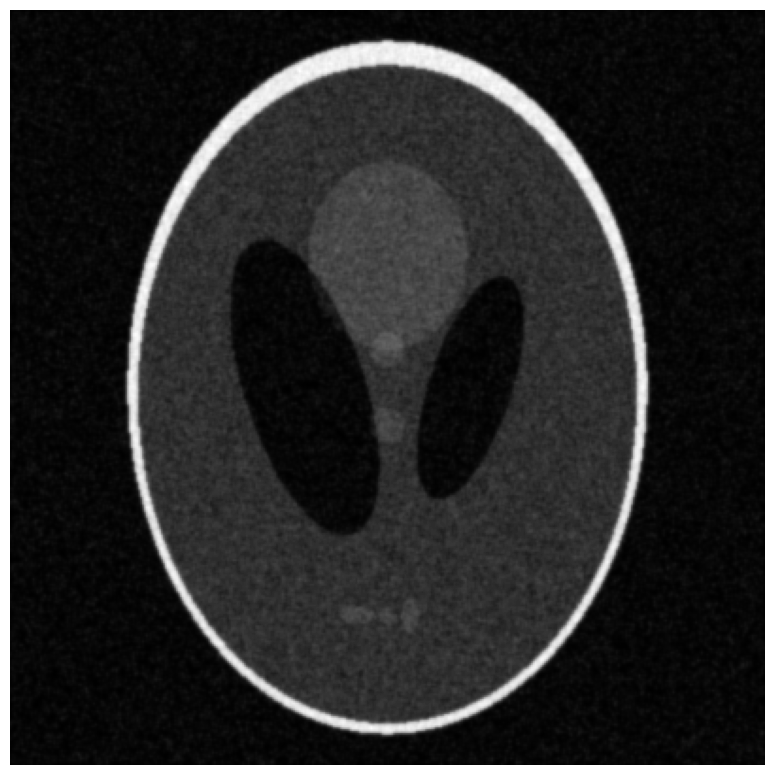

In [7]:
mae = numpy.array(numpy.load(path_output / 'mae.npy')).T
index = numpy.argmin(mae, axis=None)
i_mae, j_mae = numpy.unravel_index(index, shape=mae.shape)

print(lamda.shape, k.shape, mae.shape)
print(i_mae, j_mae)

img_denoised = lasp.filters.anisotropic_filter(img_noised, lamda[j_mae], k[i_mae], 40)

figure = matplotlib.pyplot.figure(figsize=(10, 10), dpi=100)
matplotlib.pyplot.axis('off')
_ = matplotlib.pyplot.imshow(img_denoised, cmap='gray')

(4,) (5,) (5, 4)
0 1


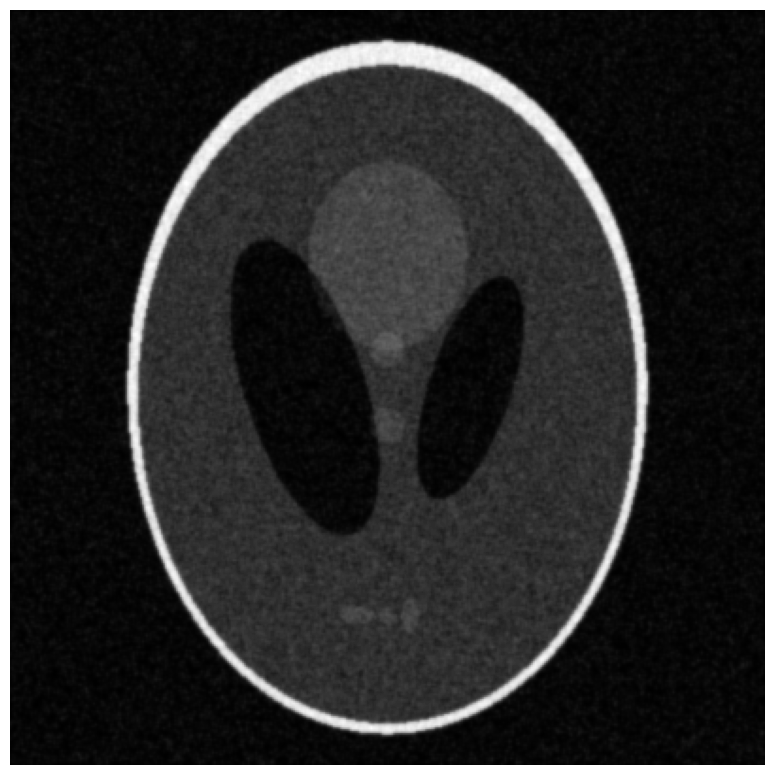

In [8]:
mse = numpy.array(numpy.load(path_output / 'mse.npy')).T

index = numpy.argmin(mse)
i_mse, j_mse = numpy.unravel_index(index, shape=mse.shape)

print(lamda.shape, k.shape, mse.shape)
print(i_mae, j_mae)

img_denoised = lasp.filters.anisotropic_filter(img_noised, lamda[j_mse], k[i_mse], 40)

figure = matplotlib.pyplot.figure(figsize=(10, 10), dpi=100)
matplotlib.pyplot.axis('off')
_ = matplotlib.pyplot.imshow(img_denoised, cmap='gray')

In [8]:
import matplotlib.pyplot
import numpy

# import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fontsize = 30

X, Y = numpy.meshgrid(lamda, k)

Xp = numpy.reshape(X, newshape=(1, -1))[0]
Yp = numpy.reshape(Y, newshape=(1, -1))[0]

X_plt: numpy.ndarray = X
Y_plt: numpy.ndarray = Y

/run/user/1000/ipykernel_9384/1938066414.py:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


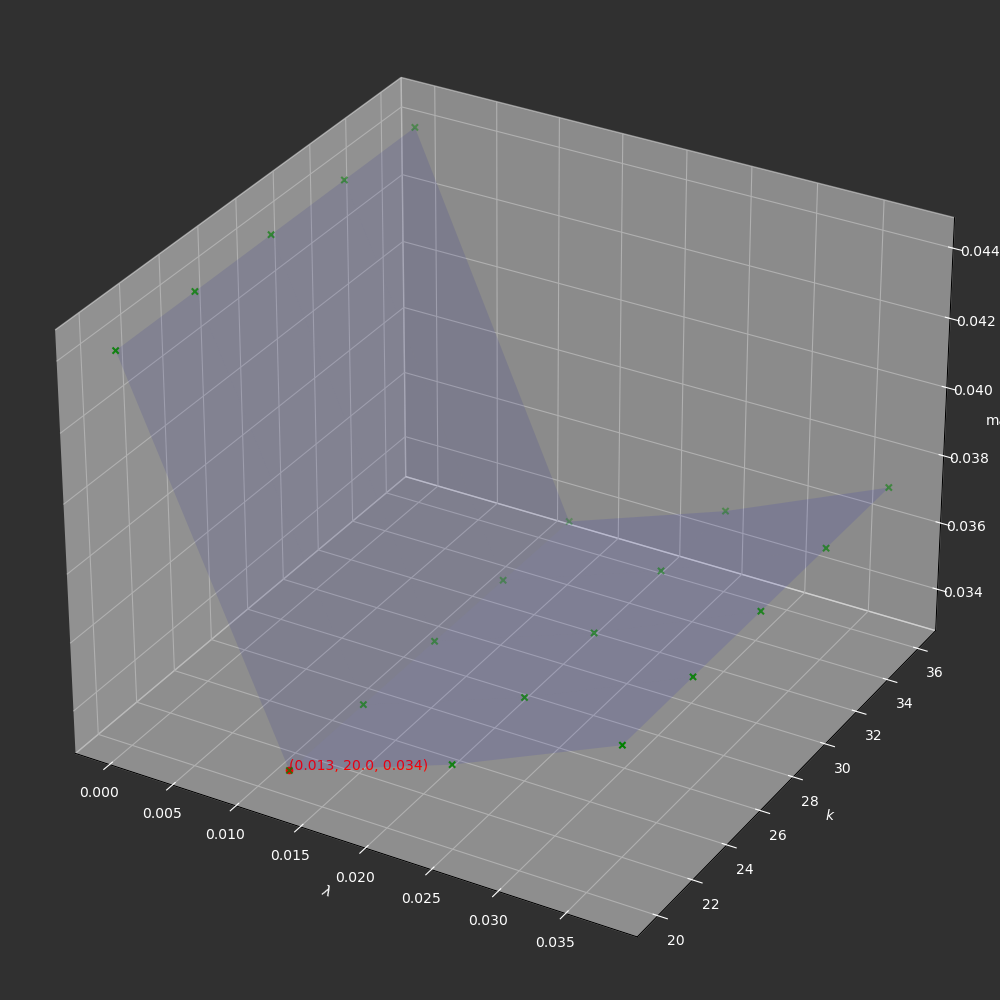

In [9]:
%matplotlib widget

import matplotlib.pyplot
import numpy

# import numpy as np
from mpl_toolkits.mplot3d import Axes3D


Z_mae_plt: numpy.ndarray = mae

coord_best: tuple[int, int] = i_mae, j_mae

# Set up a figure twice as tall as it is wide
fig = matplotlib.pyplot.figure(figsize=(10, 10), dpi=100)


# Graph 3D MSE

ax = Axes3D(fig)

## Display surface and points
_ = ax.plot_surface(X_plt, Y_plt, Z_mae_plt, color='blue', alpha=0.1)
_ = ax.scatter(X_plt, Y_plt, Z_mae_plt, color='green', marker='x')

## Display best point
s_color, s_spatial, mae = X_plt[coord_best], Y_plt[coord_best], Z_mae_plt[coord_best]
_ = ax.scatter(s_color, s_spatial, mae, color='red', marker='o')
ax.text(s_color, s_spatial, mae, '({:.3f}, {}, {:.3f})'.format(s_color, s_spatial, mae), color='red')

# setting title and labels
ax.set_title('MAE', fontsize=fontsize)
ax.set_xlabel('$\lambda$')
ax.set_ylabel('$k$')
ax.set_zlabel('mae')

matplotlib.pyplot.show()

/run/user/1000/ipykernel_9154/350776906.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


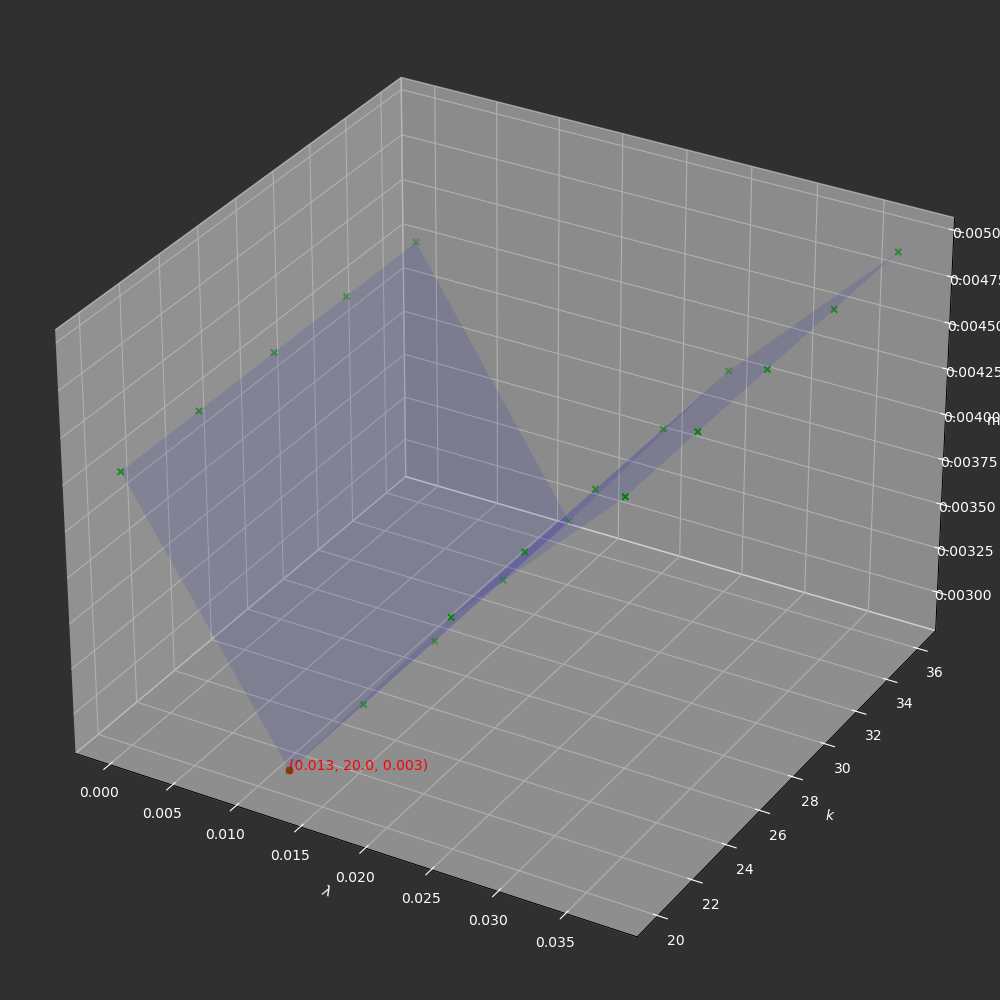

In [12]:
%matplotlib widget


Z_mse_plt: numpy.ndarray = mse


coord_best: tuple[int, int] = i_mse, j_mse


# Set up a figure twice as tall as it is wide
fig = matplotlib.pyplot.figure(figsize=(10, 10), dpi=100)


# Graph 3D MSE

ax = Axes3D(fig)

## Display surface and points
_ = ax.plot_surface(X_plt, Y_plt, Z_mse_plt, color='blue', alpha=0.1)
_ = ax.scatter(X_plt, Y_plt, Z_mse_plt, color='green', marker='x')

## Display best point
s_color, s_spatial, mse = X_plt[coord_best], Y_plt[coord_best], Z_mse_plt[coord_best]
_ = ax.scatter(s_color, s_spatial, mse, color='red', marker='o')
ax.text(s_color, s_spatial, mse, '({:.3f}, {}, {:.3f})'.format(s_color, s_spatial, mse), color='red')



# setting title and labels
ax.set_title('MSE', fontsize=fontsize)
ax.set_xlabel('$\lambda$')
ax.set_ylabel('$k$')
ax.set_zlabel('mse')

matplotlib.pyplot.show()
